#VINAY VITTAL MOOLYA - 20BCE1318 - SMARTBRIDGE AI ASSIGNMENT 2

Build an ANN model for Drug classification.<br>
This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. 
<br>The goal is to develop a model that can accurately predict the class or category of a given drug based on its features.


Dataset Link: https://www.kaggle.com/datasets/prathamtripathi/drug-classification<br>
Task 1: Read the dataset and do data pre-processing<br>
Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)<br> Task 3: Test the model with random data

In [66]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/sample_data/drug200.csv')

display(df)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


DATA PREPROCESSING

In [67]:
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [68]:
# CHECK WHETHER WE HAVE TO HANDLE THE NULL VALUES
print(df.isnull().sum())

# SEEMS LIKE THERE ARE NO NULL RECORDS.

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [69]:
print(df.describe(include="all"))

               Age  Sex    BP Cholesterol     Na_to_K   Drug
count   200.000000  200   200         200  200.000000    200
unique         NaN    2     3           2         NaN      5
top            NaN    M  HIGH        HIGH         NaN  DrugY
freq           NaN  104    77         103         NaN     91
mean     44.315000  NaN   NaN         NaN   16.084485    NaN
std      16.544315  NaN   NaN         NaN    7.223956    NaN
min      15.000000  NaN   NaN         NaN    6.269000    NaN
25%      31.000000  NaN   NaN         NaN   10.445500    NaN
50%      45.000000  NaN   NaN         NaN   13.936500    NaN
75%      58.000000  NaN   NaN         NaN   19.380000    NaN
max      74.000000  NaN   NaN         NaN   38.247000    NaN


In [70]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


<Axes: >

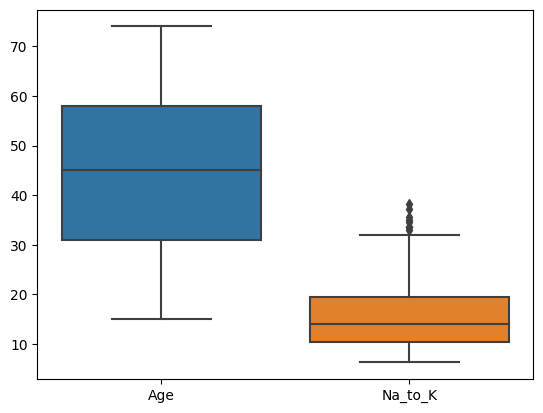

In [71]:
import seaborn as sns

sns.boxplot(df)

In [72]:
drugs = df.Drug.unique();
print(drugs)

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [73]:
# CHECKING FOR ENCODING REQUITEMENT

# FROM THE DATASET WE SEE [SEX,BP,CHOLESTROL,DRUG] ARE CATEGORICAL AND THEY NEED TO BE ENCODED

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

display(df)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


#BUILDING THE MODEL

In [74]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Y = df['Drug']

df = df.drop(['Drug'],axis = 1)

X = df

# splitting the data into test and train data
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size =0.3,random_state=42)

# we observed that there were 5 classes
ytrain_cat = to_categorical(ytrain,num_classes=5)
ytest_cat = to_categorical(ytest,num_classes=5)

print(xtrain.shape,xtest.shape)


(140, 5) (60, 5)


In [98]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation = "relu"))
model.add(Dense(64,activation = "relu"))
model.add(Dense(5,activation = "softmax"))

model.compile(optimizer = "adam" , loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(xtrain, ytrain_cat, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 2.0787 - accuracy: 0.3071
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 1.3939 - accuracy: 0.5429
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 1.2970 - accuracy: 0.5429
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 1.1455 - accuracy: 0.5500
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 1.0495 - accuracy: 0.5714
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 1.0242 - accuracy: 0.5929
Epoch 7/10
5/5 [==============================] - 0s 5ms/step - loss: 1.0266 - accuracy: 0.5929
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9947 - accuracy: 0.5929
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9934 - accuracy: 0.5929
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9778 - accuracy: 0.5929


In [99]:
y_pred = model.predict(xtest)

scores = model.evaluate(xtrain, ytrain_cat, verbose=0)

print(scores)

2/2 [==============================] - 0s 5ms/step
[0.9356759190559387, 0.6499999761581421]


In [100]:
from sklearn.metrics import accuracy_score

final_pred = []
for i in y_pred:
  final_pred.append(np.argmax(np.array(i)).astype("int32"))

The accuracy of the drug classification

In [101]:
print(accuracy_score(ytest,final_pred))

0.5666666666666667


Drawing a confusion matrix to understand the classification error

In [102]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(ytest,final_pred)

display(conf_mat)

array([[25,  0,  0,  0,  1],
       [ 5,  0,  2,  0,  0],
       [ 0,  0,  2,  0,  1],
       [ 3,  0,  0,  0,  3],
       [10,  0,  1,  0,  7]])

Testing the Model with random data

In [107]:
pred_data = np.array([67,0,0,1,7.777])

pred_data = pred_data.reshape(1,5)
test_pred = model.predict(pred_data)

print(test_pred)

1/1 [==============================] - 0s 40ms/step
[[0.03103008 0.05486197 0.5247732  0.03269768 0.3566371 ]]


these indicate the probabilities that the patient belongs to which drug

In [108]:
drugs.sort()
print(drugs)

print("The predicted drug for the given random patient :: ",drugs[np.argmax(test_pred)])

['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']
The predicted drug for the given random patient ::  drugB
